In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error

# Step 1: Data Loading and Preprocessing
url = "https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv"
data = pd.read_csv(url)

print("Total no.of points = {}".format(data.shape[0]))
data.head(9)

Total no.of points = 8425


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes


In [3]:
data.drop_duplicates(inplace=True)

In [4]:
data.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

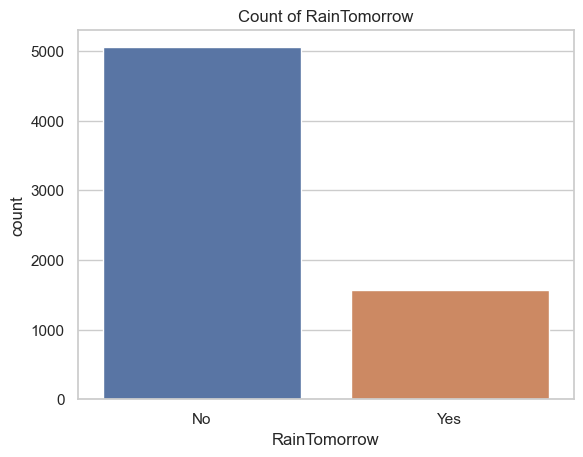

In [9]:
# Plotting the count of RainTomorrow
sns.set(style="whitegrid")
sns.countplot(x='RainTomorrow', data=data)
plt.title("Count of RainTomorrow")
plt.show()

In [10]:
#Separating the data based on its class label.
data_yes = data[data['RainTomorrow']=='Yes']
data_no = data[data['RainTomorrow']=='No']

In [11]:
#Observing the mode for all columns when RainTomorrow = Yes  
mode_values_for_yes = data_yes.mode()
mode_values_for_yes

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-03-14,PerthAirport,13.2,19.0,0.0,2.6,0.0,N,37.0,N,...,91.0,67.0,1014.1,1011.1,8.0,8.0,14.8,17.0,No,Yes
1,2009-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2009-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2009-06-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2009-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2009-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2009-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Observing the mode for all columns when RainTomorrow = No  
mode_values_for_no = data_no.mode()
mode_values_for_no

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2011-01-21,PerthAirport,12.0,20.0,0.0,4.0,11.0,E,35.0,SW,...,68.0,49.0,1020.0,1017.8,1.0,1.0,18.0,19.2,No,No
1,2011-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2011-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2011-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data_no['MaxTemp'].median()

24.1

In [16]:
# Read data from the provided link
url = "https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv"
data = pd.read_csv(url)

# Separate data for 'Yes' and 'No' instances of RainTomorrow
data_yes = data[data['RainTomorrow'] == 'Yes'].copy()
data_no = data[data['RainTomorrow'] == 'No'].copy()

# Replace NaN values with mode for temperature-related features
temp_features = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']
for feature in temp_features:
    data_yes[feature].fillna(value=data_yes[feature].mode()[0], inplace=True)
    data_no[feature].fillna(value=data_no[feature].mode()[0], inplace=True)

# Replace NaN values with mode for humidity-related features
humidity_features = ['Humidity9am', 'Humidity3pm']
for feature in humidity_features:
    data_yes[feature].fillna(value=data_yes[feature].mode()[0], inplace=True)
    data_no[feature].fillna(value=data_no[feature].mode()[0], inplace=True)

# Replace NaN values with 0.0 for rainfall feature
data_yes['Rainfall'].fillna(value=0.0, inplace=True)
data_no['Rainfall'].fillna(value=0.0, inplace=True)

# Replace NaN values with median for pressure-related features
pressure_features = ['Pressure9am', 'Pressure3pm']
for feature in pressure_features:
    data_yes[feature].fillna(value=data_yes[feature].median(), inplace=True)
    data_no[feature].fillna(value=data_no[feature].median(), inplace=True)

# Replace NaN values with median for wind speed features
wind_speed_features = ['WindSpeed9am', 'WindSpeed3pm']
for feature in wind_speed_features:
    data_yes[feature].fillna(value=data_yes[feature].median(), inplace=True)
    data_no[feature].fillna(value=data_no[feature].median(), inplace=True)

# Replace NaN values with median for WindGustSpeed feature
data_yes['WindGustSpeed'].fillna(value=data_yes['WindGustSpeed'].median(), inplace=True)
data_no['WindGustSpeed'].fillna(value=data_no['WindGustSpeed'].median(), inplace=True)

In [17]:
# For RainToday feature we cannot fill any value, so better to remove the NaN values 
data_yes.dropna(inplace=True)
data_no.dropna(inplace=True)

In [19]:
data_filled = pd.concat([data_yes, data_no], ignore_index=True)

In [20]:
data_filled.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [21]:
print("Percentage of removed points= {}%".format(100.00-(len(data_filled)*100/len(data))))

Percentage of removed points= 54.91988130563798%


In [42]:
# sorting the data based on data (Time based splitting)
data_filled=data_filled.sort_values(by='Date')

In [53]:
import pandas as pd

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv"
data = pd.read_csv(url)

# Step 2: Handle missing values
data_filled = data.dropna()

# Step 3: Remove unwanted features: 'Date', 'Location'
data_final = data_filled.drop(['Date', 'Location'], axis=1)

In [54]:
data_final.shape

(3790, 21)

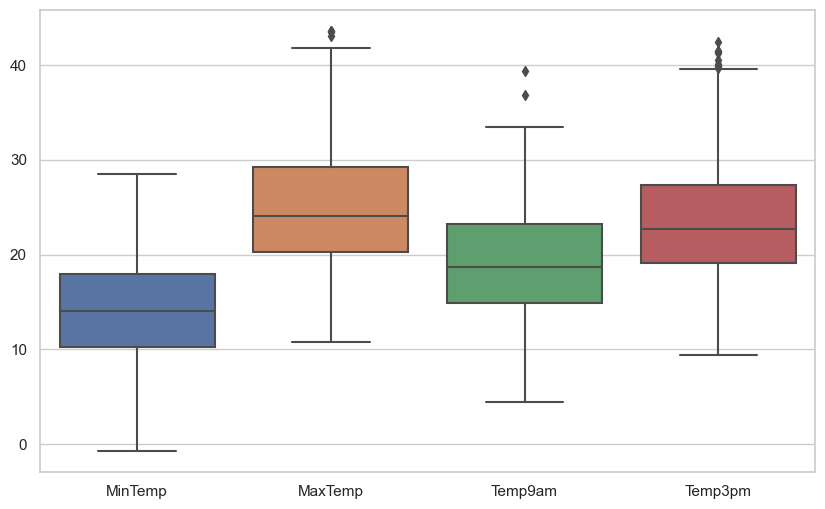

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outliers we are checking only for numerical features
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']])
plt.show()

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Fit and transform the data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [47]:
# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Instantiate the model
clf = LogisticRegression()

# Fit the model to your training data
clf.fit(X_train_scaled, y_train)

# Now you can access the coefficients
coefficients = clf.coef_[0]

In [48]:
clf.coef_[0]

array([-0.51687337, -0.37057516,  0.32858427,  0.09095549, -0.55957454,
        0.79925885, -0.08350611, -0.05026515,  0.00786838,  1.28419861,
        0.5864464 , -0.96651743, -0.02256498,  0.49260425,  0.38824742,
        0.57518568, -0.13053626, -0.13832318,  0.07805105, -0.0316268 ,
       -0.03020838, -0.08348635,  0.00425558,  0.04294669,  0.15719085,
        0.05785308,  0.05841036,  0.0410473 ,  0.07029113, -0.06049034,
        0.06989094, -0.06224725, -0.11413451, -0.0288    , -0.0780238 ,
        0.1337878 ,  0.06928075,  0.16919031, -0.11871957, -0.03631375,
       -0.21864728, -0.15177683, -0.10220333, -0.01243502,  0.08891415,
        0.06959604,  0.1058198 ,  0.04427435,  0.11692529,  0.10922098,
        0.05251641, -0.05184042, -0.01629507, -0.10762694,  0.07157805,
        0.07746255, -0.11781043,  0.00286145, -0.00150149,  0.01493179,
       -0.11285456,  0.00952176,  0.03229837,  0.00840831, -0.12260176,
        0.12260176])

In [49]:
feature_weights=sorted(zip(clf.coef_[0],column_names),reverse = True)

In [50]:
feature_weights

[(1.2841986080422345, 'WindSpeed9am'),
 (0.799258852103597, 'WindGustDir'),
 (0.5864463955729962, 'WindSpeed3pm'),
 (0.5751856767445813, 'Cloud9am'),
 (0.492604251305006, 'Pressure9am'),
 (0.38824742034508136, 'Pressure3pm'),
 (0.3285842678066808, 'Rainfall'),
 (0.09095548501485654, 'Evaporation'),
 (0.07805105109517385, 'Temp3pm'),
 (0.00786838336452833, 'WindDir3pm'),
 (-0.022564975513201455, 'Humidity3pm'),
 (-0.03162679723030559, 'RainToday'),
 (-0.050265149505824114, 'WindDir9am'),
 (-0.08350611356681899, 'WindGustSpeed'),
 (-0.1305362554808209, 'Cloud3pm'),
 (-0.1383231795339753, 'Temp9am'),
 (-0.3705751574220724, 'MaxTemp'),
 (-0.516873368059974, 'MinTemp'),
 (-0.5595745381737273, 'Sunshine'),
 (-0.9665174281107803, 'Humidity9am')]

In [51]:
def will_rain_fall_for_this_conditions(xq):
    
    xq["WindGustDir"]=WindGustDir_encode.transform([xq["WindGustDir"]])
    xq["WindDir9am"]=WindDir9am_encode.transform([xq["WindDir9am"]])
    xq["WindDir3pm"]=WindDir3pm_encode.transform([xq["WindDir3pm"]])
    xq["RainToday"]=RainToday_encode.transform([xq["RainToday"]])
    xq=np.array(list((xq.values())))
    final_xq = scaler.transform(xq.reshape(1, -1))
    chance=clf.predict_proba(final_xq)[:,1]
    if chance>=0.5:
        print("Yes, there is a {} % chance of rain can fall on tommorow ".format(chance*100))
    else:
        print("No, there is only {}% chance of rainfall hence we cannot expect rain on tommorow ".format(chance*100))
    print("Because today's Humidity at 3pm ={}%,Atmosphereic Pressure at 9am={}millibars,and Wind Gust Speed ={}km/hr, which are very good sign for rainfall"
          .format(Humidity3pm,Pressure9am,WindGustSpeed)) 

In [8]:
#Giving one query point here

MinTemp   = 26.2
MaxTemp   = 31.7
Rainfall   = 2.8
Evaporation   = 5.4
Sunshine   = 3.5
WindGustDir   = "NNW"
WindGustSpeed   = 57
WindDir9am   = "NNW"
WindDir3pm   = "NNW"
WindSpeed9am   = 20
WindSpeed3pm   = 13
Humidity9am   = 81
Humidity3pm   = 95
Pressure9am   = 1007.2
Pressure3pm   = 1006.1
Cloud9am   = 7
Cloud3pm   = 8
Temp9am   = 28.8
Temp3pm   = 25.4
RainToday   ="Yes"

In [12]:
# Assuming you have the feature values available
MinTemp = 20
MaxTemp = 30
Rainfall = 10
Evaporation = 5
Sunshine = 7
# Define other feature values similarly

# Define the column names
column_names = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
                'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
                'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']

# Populate the point list with feature values
point = [MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, 'NW', 35, 'NE', 'E', 20, 25,
         60, 50, 1010, 1005, 5, 6, 22, 28, 'Yes']

# Create the xq dictionary
xq = {}
for i, name in enumerate(column_names):
    xq[name] = point[i]

In [32]:
# Step 6: Evaluate the models
# For classification
y_pred_cls = clf.predict(X_test_cls)
accuracy = accuracy_score(y_test_cls, y_pred_cls)
print("Accuracy of RainTomorrow prediction:", accuracy)

# For regression
y_pred_reg = reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("Mean Squared Error of Rainfall prediction:", mse)

Accuracy of RainTomorrow prediction: 0.8931398416886543
Mean Squared Error of Rainfall prediction: 30.05880670448548
